In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import os


Displaying 10 images from type: Big Truck


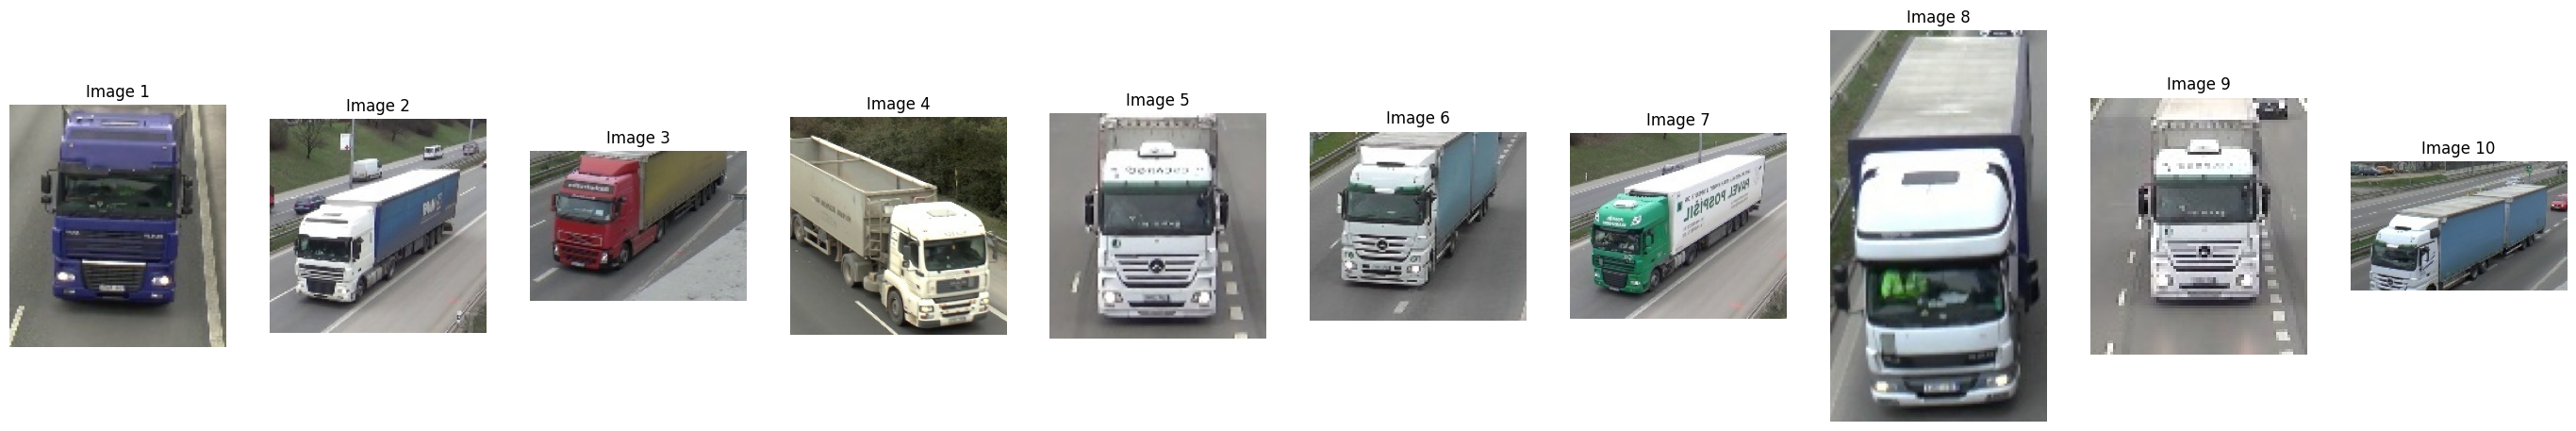

Displaying 10 images from type: car


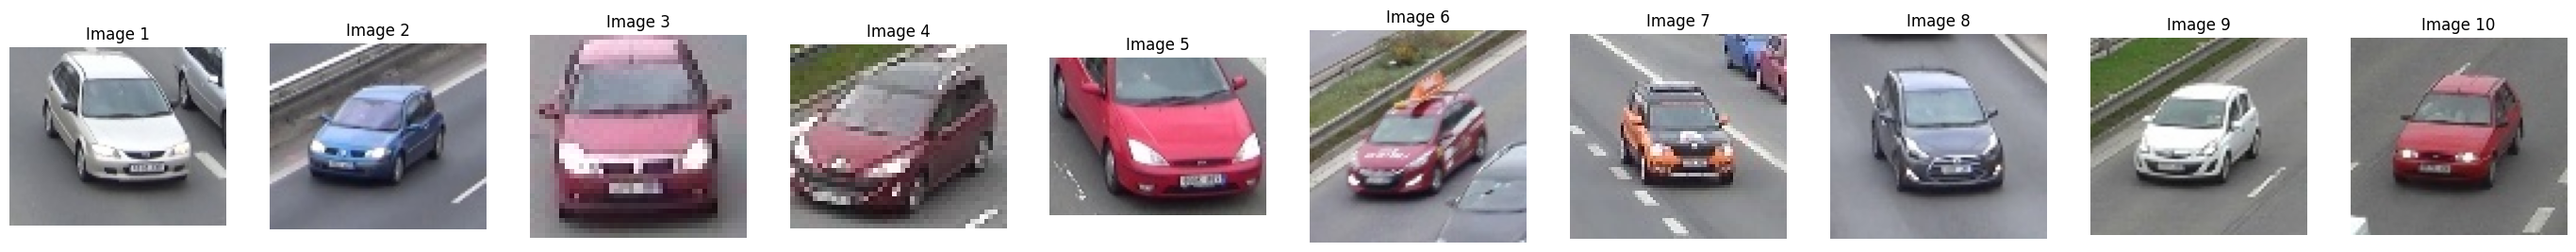

Displaying 10 images from type: Van


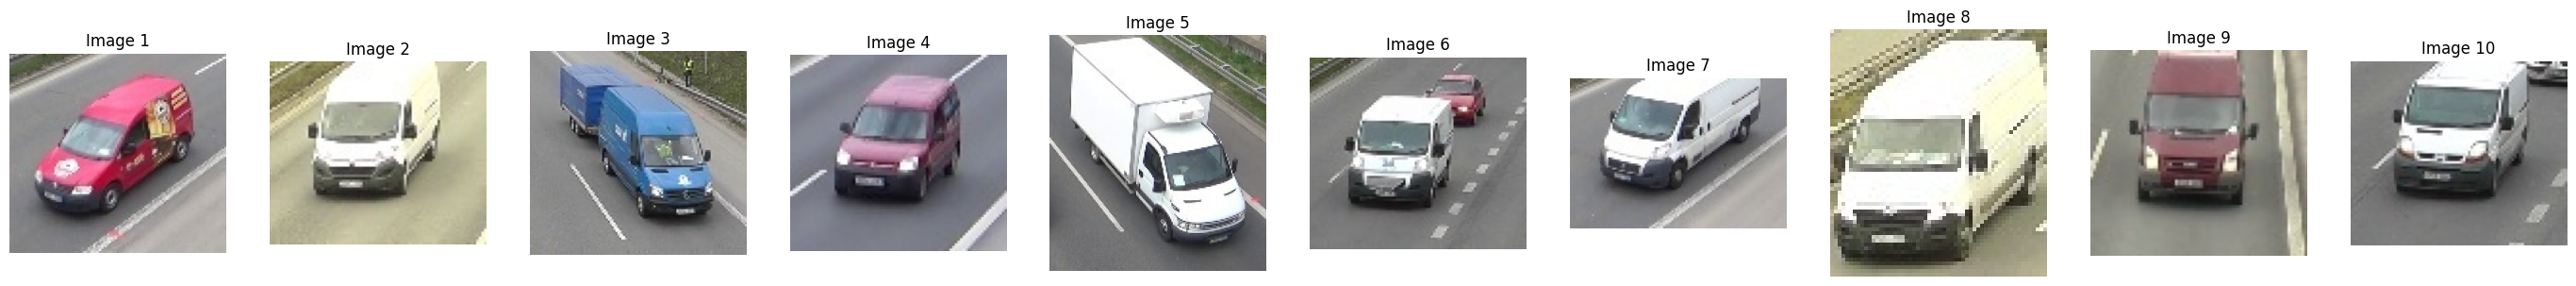

In [8]:
dataset_path = "Vechicle"
num_images_to_show=10
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        print(f"Displaying {num_images_to_show} images from type: {class_name}")
        image_files = [f for f in os.listdir(class_path)]
        plt.figure(figsize=(35, 15)) # Adjust figure size as needed
        for i, image_file in enumerate(image_files[:num_images_to_show]):
            image_path = os.path.join(class_path, image_file)
            img = Image.open(image_path)
            plt.subplot(1, num_images_to_show, i + 1)
            plt.imshow(img)
            plt.title(f"Image {i+1}")
            plt.axis('off')
        plt.show()

In [10]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [11]:
def load_images_from_folder(folder_path, image_size=(128, 128)):
    images = []
    labels = []
    class_names = os.listdir(folder_path)
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_path):
            img = load_img(os.path.join(class_path, filename), target_size=image_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label)

    return np.array(images), np.array(labels), class_names

# Load the dataset
dataset_path = 'Vechicle'
X, y, class_names = load_images_from_folder(dataset_path)
print(f"Loaded {X.shape[0]} images of size {X.shape[1:]}.")


Loaded 1183 images of size (128, 128, 3).


In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the image data to feed into the DNN
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convert labels to one-hot encoding
num_classes = len(class_names)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [14]:
# Build the DNN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_flat.shape[1],)),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(X_train_flat, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 301ms/step - accuracy: 0.3366 - loss: 29.7319 - val_accuracy: 0.3947 - val_loss: 2.6159
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - accuracy: 0.3801 - loss: 3.1438 - val_accuracy: 0.4211 - val_loss: 1.6840
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - accuracy: 0.4381 - loss: 2.2717 - val_accuracy: 0.5947 - val_loss: 1.4304
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 309ms/step - accuracy: 0.6017 - loss: 1.1855 - val_accuracy: 0.6421 - val_loss: 0.8610
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - accuracy: 0.6884 - loss: 0.8364 - val_accuracy: 0.5947 - val_loss: 1.0341
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.6622 - loss: 0.9036 - val_accuracy: 0.5895 - val_loss: 1.0640
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 284ms/step - accuracy: 0.6835 - loss: 0.8173 - val_accuracy: 0.6368 - val_loss: 0.9566
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - accuracy: 0.7385 - loss: 0.6407 - val_accuracy: 0

In [16]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6933 - loss: 0.7626
Test Accuracy: 71.73%


In [17]:
# Generate predictions and evaluate the model
y_pred = np.argmax(model.predict(X_test_flat), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Display the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Classification Report:
              precision    recall  f1-score   support

   Big Truck       0.87      0.71      0.78        73
         car       0.65      0.89      0.75        76
         Van       0.69      0.57      0.62        88

    accuracy                           0.72       237
   macro avg       0.74      0.73      0.72       237
weighted avg       0.73      0.72      0.71       237

Confusion Matrix:
[[52  6 15]
 [ 1 68  7]
 [ 7 31 50]]


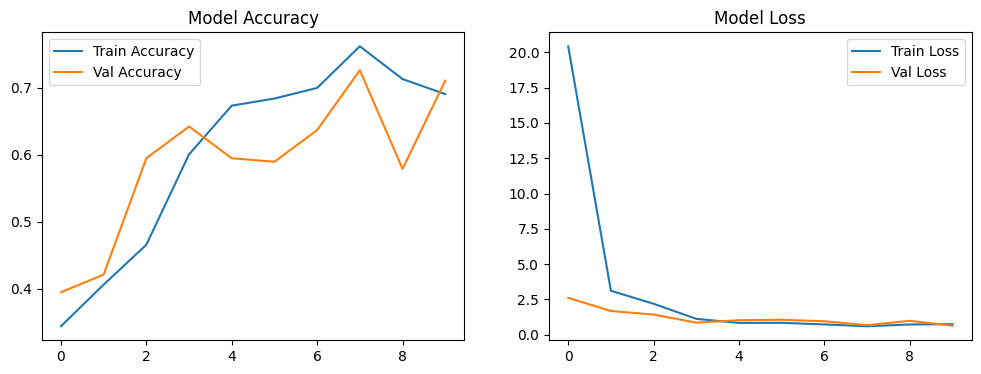

In [18]:
# Plot the training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.show()

plot_history(history)